### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
import cv2
from scipy import misc, fftpack
%matplotlib inline

1. Use the new image found in google with shape of 2048 $\times$ 2048
2. .fft2 to apply FFT on the image and .fftshift to realign the the center of the image to be the same as the original image.

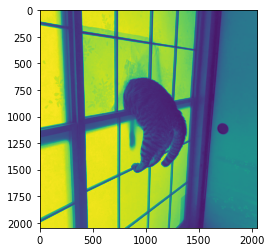

In [43]:
image = mpimg.imread('images/259564620_467210108154973_4749558012940684662_n.jpg')

im0 = image[:,:,0]

norm = np.sqrt(im0.shape[0] * im0.shape[1])

D1 = fftpack.fft2(im0)/norm
D2 = fftpack.fftshift(D1)/norm

py.imshow(im0, aspect = 1)
py.show()

**Low Pass Filter**

3. For Low Pass Filter, create mask using circle formula.
4. The higher the radius, the lower the intensity of the blur.

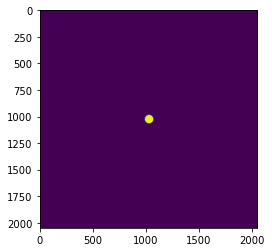

In [44]:
n = 2049
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 40

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = (X**2 + Y**2) < R**2

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.fftshift(D1_mask)
D3_mask = fftpack.fft2(D1_mask)/n

plt.imshow(np.abs(D3_mask))

5. Multiplying the mask to the image applies the filter onto the image.
6. .fftshift to re-center the center of the image and .ifft to reverse the effects of FFT.
7. Obtain filtered image.

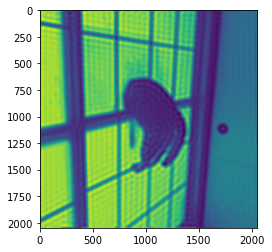

In [45]:
filtered = D2 * M
clean_im = fftpack.fftshift(filtered)
inv_img = fftpack.ifft2(clean_im)
new_f_clean = np.abs(inv_img)

plt.imshow(new_f_clean)
# plt.imshow(new_f_clean, cmap=plt.get_cmap('gray'))

**High Pass Filter**

8. For High Pass Filter, the procedure is almost the same as Low Pass Filter and any other filter but with different type of mask.
9. Create new mask as the opposite of Low Pass Filter (instead of circle in the center, there is a hole in the center instead). The higher the radius, the lower the intensity of the blur

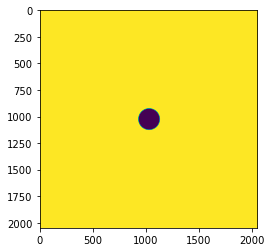

In [46]:
n = 2049
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 100

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = (X**2 + Y**2) > R**2

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.fftshift(D1_mask)
D3_mask = fftpack.fft2(D1_mask)/n

plt.imshow(np.abs(D3_mask))

10. Apply mask to the transformed image.
11. Shift back the image and reverse the FFT effects on the image

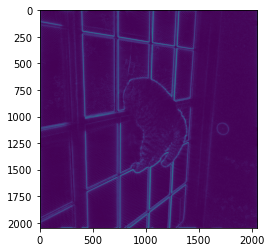

In [47]:
filtered = D2 * M
clean_im = fftpack.fftshift(filtered)
inv_img = fftpack.ifft2(clean_im)
new_f_clean = np.abs(inv_img)

plt.imshow(new_f_clean)
# plt.imshow(new_f_clean, cmap=plt.get_cmap('gray'))

**Band Filter**

12. Create a ring(band) mask by xor-ing big circle and small circle (Low Pass Filter requires circle mask, so we create 2 different-sized circle mask).

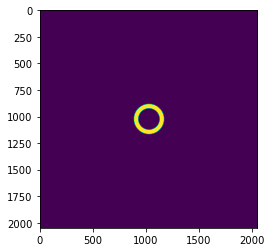

In [48]:
n = 2049
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 100
s = 0.5

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

big_cir = X**2 + Y**2 < R**2
small_cir = s*X**2 + s*Y**2 < R**2
M = np.logical_xor(small_cir ,big_cir)

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.fftshift(D1_mask)
D3_mask = fftpack.fft2(D1_mask)/n

# plt.imshow(np.abs(D3_mask))
plt.imshow(np.abs(M))

13. Apply mask(filter) to the image.
14. Shift the image and reverse FFT effects on the image

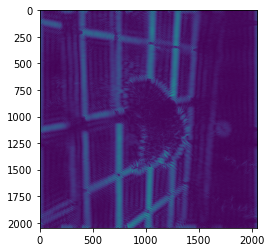

In [49]:
filtered = D2 * M
clean_im = fftpack.fftshift(filtered)
inv_img = fftpack.ifft2(clean_im)
new_f_clean = np.abs(inv_img)

plt.imshow(new_f_clean)
# plt.imshow(new_f_clean, cmap=plt.get_cmap('gray'))

**Gaussian Blur Filter**

15. Create a mask from the formula:
$$G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}$$
16. The higher the sigma value is, the lower the intensity of the blur.


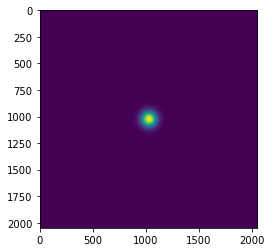

In [50]:
n = 2049
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

# Original Value: smol_sigma = 0.84089642
smol_sigma = 50
M = (1/2*np.pi*smol_sigma**2) * np.exp(- (X**2 + Y**2)/( 2*smol_sigma**2))

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.fftshift(D1_mask)
D3_mask = fftpack.fft2(D1_mask)/n

# plt.imshow(np.abs(D3_mask))
plt.imshow(np.abs(M))

13. Apply the blur to the image.
14. Shift the image and reverse FFT effects on the image

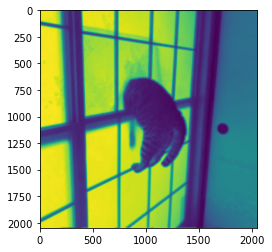

In [51]:
filtered = D2 * M
clean_im = fftpack.fftshift(filtered)
inv_img = fftpack.ifft2(clean_im)
new_f_clean = np.abs(inv_img)

new_f_clean -= new_f_clean.min()
new_f_clean = new_f_clean*255/new_f_clean.max()
new_f_clean = new_f_clean.astype(np.uint8)

plt.imshow(new_f_clean)
# plt.imshow(new_f_clean, cmap=plt.get_cmap('gray'))